# First Trial on Lunar Occultation light Curve Modeling with Python

Hello,
in this first notebook, I will try to explain how I try to make a code for LO light curve modeling with Python.

First, do all the needed imports

In [3]:
%matplotlib inline
import numpy as np
import math
import scipy.optimize as opt
import scipy.special as spc
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

then, we read the input file. Inside the file, there are three columns which are wavelength, weighting value #1 and weighting value #2 for first, second, and third column respectively and assign them into pjgGel, weight1 and weight2. Let use pandas for importing data from csv file.

In [11]:
import pandas as pd

data = pd.read_csv('transcurveb.txt', delim_whitespace=True)
pjgGel, weight1, weight2 = data.values.T

For x-axis, we assign a range and divide it into smaller value. Then, the weighted wavelength values are the original value of wavelength taken from input file times the weighted values.

In [4]:
x = np.linspace(-100., 100., 50000)
pjgGel_weight = pjgGel * weight1

We create a 2D array to incorporate the result which are values of the Fresnel integral.

In [5]:
n = len(x)
m = len(pjgGel_weight)

result = np.zeros((n, m))

The Fresnel integral function is given by Python package **scipy.special** and we divide this function into its sine and cosine function.

In [6]:
for i in range (m):
    for j in range (n):
        w = x[j] * 1e10 * math.sqrt(2. / (pjgGel_weight[i] * 3.84e18))
        s, c = spc.fresnel(w)
        result[j, i] = 0.5 * (0.5 + s + 0.5 + c) ** 2
total_res = result.sum(axis = 1)

and then we plot the result

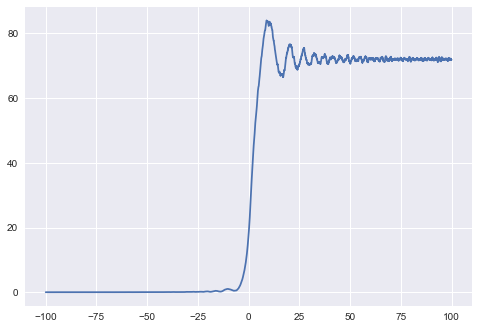

In [7]:
plt.plot(x, total_res)
plt.grid(True)
# plt.show()

We can compare it with a monochromatic source. For example, we pick a source and observe it at 15000 \AA

In [8]:
pjgGel_tes = 15000.

result2 = np.zeros((n, m))

for i in range (m):
    for j in range (n):
        w2 = x[j] * 1e10 * math.sqrt(2. / (pjgGel_tes * 3.84e18))
        s2, c2 = spc.fresnel(w2)
        result2[j, i] = 0.5 * (0.5 + s2 + 0.5 + c2) ** 2
total_res2 = result2.sum(axis = 1)

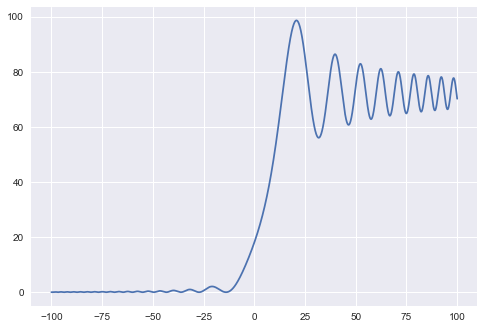

In [9]:
plt.plot(x, total_res2)
plt.grid(True)

We also can superimpose those two plots to be able to see the differences clearly. The wavelength range 'smoothing out' the diffraction pattern.

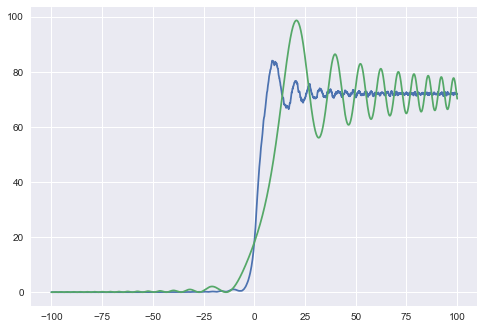

In [10]:
plt.plot(x, total_res)
plt.plot(x, total_res2)
plt.grid(True)